<a href="https://colab.research.google.com/github/Mauricio8583/Google-Colab-Files/blob/main/Reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150
34/34 [==============================] - 1s 8ms/step - loss: 1.9477 - accuracy: 0.3887
Epoch 2/150
34/34 [==============================] - 0s 8ms/step - loss: 1.7909 - accuracy: 0.4007
Epoch 3/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7860 - accuracy: 0.4007
Epoch 4/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7816 - accuracy: 0.4007
Epoch 5/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7797 - accuracy: 0.4007
Epoch 6/150
34/34 [==============================] - 0s 6ms/step - loss: 1.7775 - accuracy: 0.4007
Epoch 7/150
34/34 [==============================] - 0s 6ms/step - loss: 1.7769 - accuracy: 0.4007
Epoch 8/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7723 - accuracy: 0.4007
Epoch 9/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7698 - accuracy: 0.4007
Epoch 10/150
34/34 [==============================] - 0s 7ms/step - loss: 1.7629 - accuracy: 0.4007
Epoch 11/

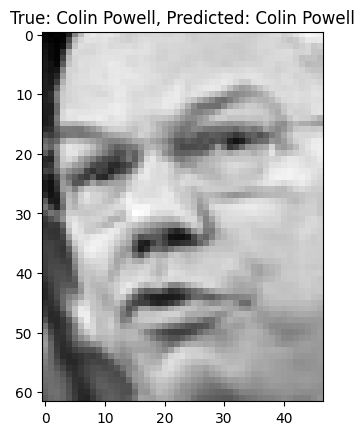

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

faces = fetch_lfw_people(min_faces_per_person=60) # Quer dizer que só será usada a imagem de pessoas que possuem ao menos 60 imagens disponiveis, diminuindo o risco de overfitting
X = faces.data
y = faces.target
target_names = faces.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 siginifica que 20% dos dados serão usados para teste e os outros 80% será para treinamento

X_train = X_train/255.0
X_test = X_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(62 * 47,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(target_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_accuracy)

predictions = model.predict(X_test)
predicted_classes = [target_names[np.argmax(prediction)] for prediction in predictions]

for i in range(10):
  plt.imshow(X_test[i].reshape(62, 47), cmap='gray')
  plt.title(f"True: {target_names[y_test[i]]}, Predicted: {predicted_classes[i]}")
  plt.show
